# Understanding Descriptive Statistics

Import the necessary libraries here:

In [40]:
# Libraries
import numpy as np 
import pandas as pd 
import random
import matplotlib

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [41]:
# your code here
dice = [1,2,3,4,5,6]
rolls = []
def rolling_dice_10():
    for i in range(10):
        r = random.choice(dice)
        rolls.append(r)
    return pd.DataFrame(rolls)

df = rolling_dice_10()
df

,0
0,5
1,2
2,4
3,1
4,4
5,1
6,6
7,3
8,4
9,2


#### 2.- Plot the results sorted by value.

In [42]:
df.columns = ['Dice_face']
df

,Dice_face
0,5
1,2
2,4
3,1
4,4
5,1
6,6
7,3
8,4
9,2


In [43]:
df = df.sort_values(by = 'Dice_face')
df

,Dice_face
3,1
5,1
1,2
9,2
7,3
2,4
4,4
8,4
0,5
6,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1162cfa50>]],
      dtype=object)

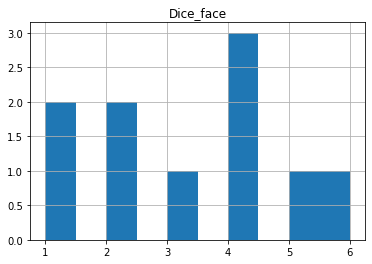

In [44]:
# your code here
df.hist()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [45]:
# your code here
df['Dice_face'].value_counts()

4    3
2    2
1    2
6    1
5    1
3    1
Name: Dice_face, dtype: int64

In [46]:
type(df['Dice_face'])

pandas.core.series.Series

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


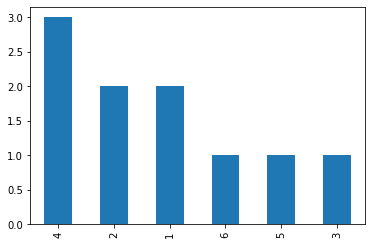

In [47]:
df['Dice_face'].value_counts().plot('bar')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


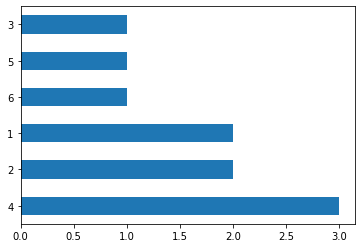

In [48]:
df['Dice_face'].value_counts().plot('barh')

In [ ]:
"""
It is the same plot, the only thing that changes are the order of the values, in the histogram we had the representation of the values from 1 to 6, while with the frequency distribution plot we reorder the elements based on their frequency, therefore the plot is different.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [57]:
# your code here
def mean_of(x):
    m = (x.sum()/len(x))
    return m

mean_of(df)

Dice_face    3.2
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [50]:
# your code here
fd = df['Dice_face'].value_counts()
fd

4    3
2    2
1    2
6    1
5    1
3    1
Name: Dice_face, dtype: int64

In [51]:
mean(fd)

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [52]:
# your code here
def median_of(y):
    sorted_y = y.sort_values()
    z = sorted_y.reset_index(drop=True)
    len_z = len(z)
    mid = (len_z // 2)-1
    mid_next = mid+1
    if (len_z % 2 == 0):
        return (z[mid] + z[mid_next])/2
    else:
        return z[mid_next]
        

median_of(df['Dice_face'])


3.5

In [53]:
df['Dice_face'].describe()

count    10.000000
mean      3.200000
std       1.686548
min       1.000000
25%       2.000000
50%       3.500000
75%       4.000000
max       6.000000
Name: Dice_face, dtype: float64

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [56]:
# your code here
def quartiles(y):
    sorted_y = y.sort_values()
    z = sorted_y.reset_index(drop=True)
    len_z = len(z)
    me = median_of(y)
    index = len_z // 2
    if (len_z % 2 == 0):
        first_half = z[:index]
        second_half = z[index:]
        q1 = median_of(first_half)
        q3 = median_of(second_half)
        return q1, me, q3
    else:
        first_half = z[:index]
        second_half = z[index+1:]
        q1 = median_of(first_half)
        q3 = median_of(second_half)    
        return q1, me, q3
        
quartiles(df['Dice_face'])


(2, 3.5, 4)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [66]:
# your code here
cha3 = pd.read_csv('/Users/Zak/Data-Analysis/4.fourth_week/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')
cha3.describe()

,Unnamed: 0,roll,value
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,3.740000
std,29.011492,29.011492,1.703354
min,0.000000,0.000000,1.000000
25%,24.750000,24.750000,2.000000
50%,49.500000,49.500000,4.000000
75%,74.250000,74.250000,5.000000
max,99.000000,99.000000,6.000000


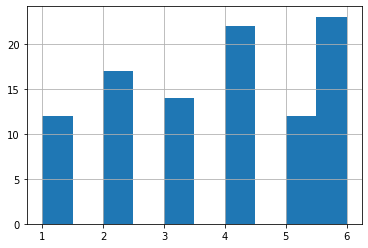

In [5]:
cha3_sorted = cha3.sort_values(by = 'value')
cha3_sorted['value'].hist()

In [6]:
cha3_sorted['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

In [ ]:
"""
the data is well distributed among the 6 options, being 6 the face with more appearance while 5 and 1 the face with the least
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [58]:
# your code here
mean_of(cha3_sorted['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [60]:
# your code here
quartiles(cha3_sorted['value'])

(2.0, 4.0, 5.0)

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

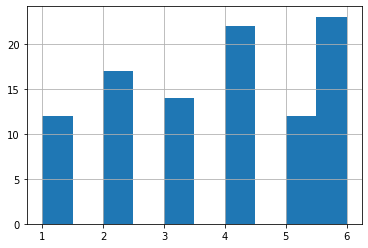

In [61]:
# your code here
cha3_sorted['value'].hist()

In [ ]:
"""
the mean is close to 4 due to the the higher frequency of the 4 and 6 faces.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [67]:
# your code here
cha4 = pd.read_csv('/Users/Zak/Data-Analysis/4.fourth_week/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')
cha4.describe()

,Unnamed: 0,roll,value
count,1000.000000,1000.000000,1000.000000
mean,499.500000,499.500000,3.447000
std,288.819436,288.819436,1.711175
min,0.000000,0.000000,1.000000
25%,249.750000,249.750000,2.000000
50%,499.500000,499.500000,3.000000
75%,749.250000,749.250000,5.000000
max,999.000000,999.000000,6.000000


In [ ]:
"""
it has slightly changed as we are dealing of the faces that have shown up, the mean and std have been slightly moved, the quartiles almost remained the same, we can say that 100 throws sample was a good representation of the 1000 population.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [75]:
# your code here
ages1 = pd.read_csv('/Users/Zak/Data-Analysis/4.fourth_week/lab-understanding-descriptive-stats/data/ages_population.csv')
ages1.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


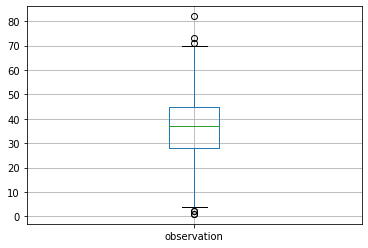

In [71]:
ages1.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116316090>]],
      dtype=object)

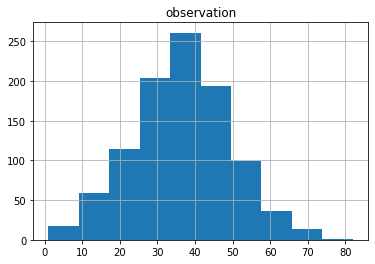

In [72]:
ages1.hist()

In [ ]:
#the mean should be between 33 and 41, while the std should be around 11

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [76]:
# your code here
ages1.describe()


,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
yap! I wasn't that far :)
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [81]:
# your code here
ages2 = pd.read_csv('/Users/Zak/Data-Analysis/4.fourth_week/lab-understanding-descriptive-stats/data/ages_population2.csv')
ages2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


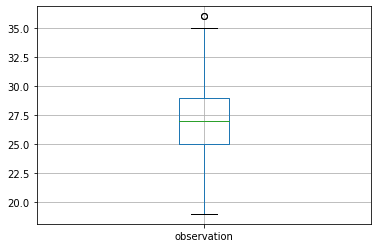

In [78]:
ages2.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117fd8390>]],
      dtype=object)

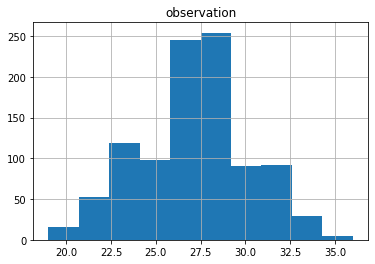

In [79]:
ages2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Indeed, big difference, here the range of the ages are much more narrow, also the std is smaller
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [83]:
# your code here
ages2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
as said before, the population is concentrated in young adult people, with a small std, nothing to do with the previous.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [87]:
# your code here
ages3 = pd.read_csv('/Users/Zak/Data-Analysis/4.fourth_week/lab-understanding-descriptive-stats/data/ages_population3.csv')
ages3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112b97550>]],
      dtype=object)

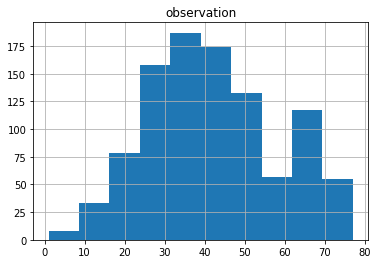

In [85]:
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [89]:
# your code here
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
this one is similar to the first file, although it counts with a bigger representation of senior people.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [91]:
# your code here
quartiles(ages3['observation'])

(30.0, 40.0, 53.0)

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""